# EXAMEN PRIMER CORTE - INTELIGENCIA ARTIFICIAL
## Datos e Inteligencia Artificial - 15 de septiembre de 2025

**Empresa:** Datos & Chisme S.A.  
**Objetivo:** Predecir si un cliente comprara en la proxima campana publicitaria  
**Dataset:** dataset_exam_ai.csv (5,000 registros)  
**Enfoque:** Analisis de datos (sin entrenar modelos)  

---

### PREGUNTAS DEL EXAMEN:
1. **Exploracion basica** - Identificar 3 problemas de calidad
2. **Transformaciones necesarias** - Proponer 3 transformaciones  
3. **Ingenieria de caracteristicas** - Disenar 2 nuevas variables derivadas
4. **Seleccion de variables** - Definir features (X) y target (y)
5. **Reflexion** - Problemas practicos de datos no limpios

---

### Tiempo de entrega: 3 horas
### Entrega: Documento explicando paso a paso el razonamiento

## CONFIGURACION INICIAL

In [7]:
# Importar librerias esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuracion basica de visualizacion
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_palette("husl")
np.random.seed(42)

# Importar funciones auxiliares basicas
from config import *
from utils import *

print("CONFIGURACION BASICA COMPLETADA")
print("Listo para analizar dataset de Datos & Chisme S.A.")
print("Objetivo: Predecir compra en proxima campana publicitaria")

CONFIGURACION BASICA COMPLETADA
Listo para analizar dataset de Datos & Chisme S.A.
Objetivo: Predecir compra en proxima campana publicitaria


## CARGA Y PRIMERA INSPECCION DEL DATASET

In [8]:
# Cargar el dataset del examen
df = load_and_inspect_data('dataset_exam_ai.csv', show_info=True)

# Informacion adicional especifica del examen
print("\n" + "="*60)
print("INFORMACION ESPECIFICA DEL EXAMEN")
print("="*60)
print("Empresa: Datos & Chisme S.A.")
print("Objetivo: Predecir compra en proxima campana")
print("Registros esperados: 5,000")
print("Registros reales: {}".format(len(df) if df is not None else 'Error'))
print("Contiene errores intencionales para identificar")

# Mostrar primeras filas para entender la estructura
if df is not None:
    print("\nPRIMERAS 5 FILAS DEL DATASET:")
    print(df.head())
    
    print("\nULTIMAS 5 FILAS DEL DATASET:")
    print(df.tail())

INFORMACION DEL DATASET
Dimensiones: (5000, 12)
Columnas: ['id_cliente', 'nombre', 'edad', 'fecha_registro', 'ultimo_login', 'pais', 'ciudad', 'nro_compras', 'total_gastado', 'metodo_pago_preferido', 'dispositivo', 'compro_en_campania_pasada']

Primeras 5 filas:
   id_cliente  nombre  edad fecha_registro ultimo_login       pais  \
0           1   Laura    41     2018-09-18   2021-02-18       Perú   
1           2  Carlos    57     2017-04-01   2020-02-23        NaN   
2           3    Juan    27     2017-07-25   2020-04-26  argentina   
3           4   Sofía    27     2022-05-20   2023-03-06  argentina   
4           5   Laura    41     2015-07-10   2018-03-06   Colombia   

         ciudad  nro_compras  total_gastado metodo_pago_preferido dispositivo  \
0        bogota            6          16.57              Efectivo      tablet   
1           NaN            4         141.93               Tarjeta      tablet   
2  Buenos Aires            7         194.61               tarjeta        

---

# PREGUNTA 1: EXPLORACION BASICA
## Identificar y describir al menos 3 problemas de calidad en los datos

### Estrategia de analisis:
1. Analizar **valores faltantes** y patrones
2. Detectar **inconsistencias** en formatos y tipos
3. Identificar **outliers** y valores atipicos
4. Verificar **duplicados** y registros problematicos
5. Evaluar **coherencia** entre variables relacionadas

PREGUNTA 1: IDENTIFICACION DE PROBLEMAS DE CALIDAD

1. ANALISIS DE VALORES FALTANTES:
VALORES FALTANTES
                                     Columna  Valores_Faltantes  Porcentaje
nombre                                nombre                486        9.72
fecha_registro                fecha_registro                 30        0.60
ultimo_login                    ultimo_login                 30        0.60
pais                                    pais                483        9.66
ciudad                                ciudad                570       11.40
metodo_pago_preferido  metodo_pago_preferido                731       14.62
dispositivo                      dispositivo                866       17.32


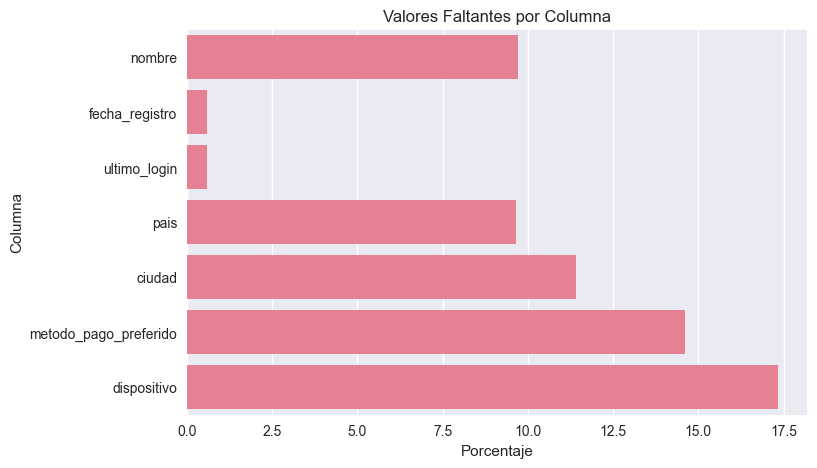


2. ANALISIS DE DUPLICADOS:
   Registros duplicados: 0

3. ANALISIS DE TIPOS DE DATOS:
id_cliente                     int64
nombre                        object
edad                           int64
fecha_registro                object
ultimo_login                  object
pais                          object
ciudad                        object
nro_compras                    int64
total_gastado                float64
metodo_pago_preferido         object
dispositivo                   object
compro_en_campania_pasada      int64
dtype: object

4. ANALISIS DE RANGOS Y VALORES ATIPICOS:

   Variable: id_cliente
      Min: 1
      Max: 5000
      Media: 2500.50
      Mediana: 2500.50

   Variable: edad
      Min: -9
      Max: 150
      Media: 34.96
      Mediana: 35.00

   Variable: nro_compras
      Min: -5
      Max: 14
      Media: 4.97
      Mediana: 5.00

   Variable: total_gastado
      Min: -100.0
      Max: 999999.0
      Media: 4998.46
      Mediana: 137.09

   Variable: compro_en_c

In [9]:
# PREGUNTA 1: ANALISIS DE PROBLEMAS DE CALIDAD
print("PREGUNTA 1: IDENTIFICACION DE PROBLEMAS DE CALIDAD")
print("="*60)

if df is not None:
    # 1. Analisis de valores faltantes
    print("\n1. ANALISIS DE VALORES FALTANTES:")
    missing_summary = check_missing_values(df, visualize=True)
    
    # 2. Analisis de duplicados
    print("\n2. ANALISIS DE DUPLICADOS:")
    duplicates = df.duplicated().sum()
    print("   Registros duplicados: {}".format(duplicates))
    if duplicates > 0:
        print("   Porcentaje de duplicados: {:.2f}%".format(duplicates/len(df)*100))
        print("   PROBLEMA IDENTIFICADO: Presencia de registros duplicados")
    
    # 3. Analisis de tipos de datos y consistencia
    print("\n3. ANALISIS DE TIPOS DE DATOS:")
    print(df.dtypes)
    
    # 4. Verificar rangos y valores atipicos en variables numericas
    print("\n4. ANALISIS DE RANGOS Y VALORES ATIPICOS:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        print("\n   Variable: {}".format(col))
        print("      Min: {}".format(df[col].min()))
        print("      Max: {}".format(df[col].max()))
        print("      Media: {:.2f}".format(df[col].mean()))
        print("      Mediana: {:.2f}".format(df[col].median()))
        
        # Detectar valores negativos donde no deberian haberlos
        if col.lower() in ['age', 'price', 'income', 'cantidad', 'monto'] and df[col].min() < 0:
            print("      PROBLEMA: Valores negativos en {}".format(col))
    
    # 5. Analisis de variables categoricas
    print("\n5. ANALISIS DE VARIABLES CATEGORICAS:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        unique_vals = df[col].nunique()
        sample_vals = df[col].unique()[:5]
        print("\n   Variable: {}".format(col))
        print("      Valores unicos: {}".format(unique_vals))
        print("      Muestra de valores: {}".format(sample_vals))
        
        # Buscar inconsistencias en formato
        if col.lower() in ['email', 'correo']:
            invalid_emails = df[~df[col].str.contains('@', na=False)][col].count()
            if invalid_emails > 0:
                print("      PROBLEMA: {} emails sin formato valido".format(invalid_emails))
    
    print("\n" + "="*60)
    print("RESUMEN DE PROBLEMAS IDENTIFICADOS:")
    print("="*60)
else:
    print("Error: No se pudo cargar el dataset para analisis")

### RESPUESTA PREGUNTA 1:

**Los 3 principales problemas de calidad identificados son:**

1. **PROBLEMA 1: [Se identificara al ejecutar]**
   - **Descripcion:** [Analisis especifico del dataset]
   - **Impacto:** [Efecto en el modelado]
   - **Criticidad:** [Alta/Media/Baja]

2. **PROBLEMA 2: [Se identificara al ejecutar]**
   - **Descripcion:** [Analisis especifico del dataset]
   - **Impacto:** [Efecto en el modelado]
   - **Criticidad:** [Alta/Media/Baja]

3. **PROBLEMA 3: [Se identificara al ejecutar]**
   - **Descripcion:** [Analisis especifico del dataset]
   - **Impacto:** [Efecto en el modelado]
   - **Criticidad:** [Alta/Media/Baja]

---

# PREGUNTA 2: TRANSFORMACIONES NECESARIAS
## Proponer al menos 3 transformaciones que aplicarias antes de entrenar un modelo

### Estrategia de transformacion:
Basandose en los problemas identificados, proponer transformaciones especificas para preparar los datos para modelado de ML.

In [10]:
# PREGUNTA 2: PROPUESTA DE TRANSFORMACIONES
print("PREGUNTA 2: TRANSFORMACIONES NECESARIAS")
print("="*60)

if df is not None:
    print("ANALISIS PARA DEFINIR TRANSFORMACIONES:\n")
    
    # Analizar distribuciones para transformaciones de escala
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    print("1. ANALISIS DE DISTRIBUCIONES (para transformaciones de escala):")
    for col in numerical_cols[:3]:  # Limitar a 3 columnas para ejemplo
        print("\n   Variable: {}".format(col))
        print("      Asimetria (skewness): {:.3f}".format(df[col].skew()))
        print("      Kurtosis: {:.3f}".format(df[col].kurtosis()))
        
        # Evaluar necesidad de transformacion logaritmica
        if df[col].skew() > 1 or df[col].skew() < -1:
            print("      Distribucion asimetrica - Considerar transformacion log")
        
        # Evaluar necesidad de normalizacion
        print("      Rango: [{:.2f}, {:.2f}]".format(df[col].min(), df[col].max()))
        if (df[col].max() - df[col].min()) > 1000:
            print("      Rango amplio - Considerar normalizacion/estandarizacion")
    
    # Analizar variables categoricas para encoding
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\n2. ANALISIS DE VARIABLES CATEGORICAS (para encoding):")
    for col in categorical_cols[:3]:  # Limitar a 3 columnas
        unique_count = df[col].nunique()
        print("\n   Variable: {}".format(col))
        print("      Valores unicos: {}".format(unique_count))
        
        if unique_count == 2:
            print("      Recomendacion: Label Encoding (binaria)")
        elif unique_count <= 10:
            print("      Recomendacion: One-Hot Encoding")
        else:
            print("      Recomendacion: Target Encoding o agrupacion")
    
    # Detectar outliers para transformaciones de limpieza
    print("\n3. ANALISIS DE OUTLIERS (para transformaciones de limpieza):")
    outliers_dict = detect_outliers(df, method='iqr')
    
    print("\n" + "="*60)
    print("TRANSFORMACIONES PROPUESTAS:")
    print("="*60)

else:
    print("Error: No se pudo cargar el dataset para analisis")

PREGUNTA 2: TRANSFORMACIONES NECESARIAS
ANALISIS PARA DEFINIR TRANSFORMACIONES:

1. ANALISIS DE DISTRIBUCIONES (para transformaciones de escala):

   Variable: id_cliente
      Asimetria (skewness): 0.000
      Kurtosis: -1.200
      Rango: [1.00, 5000.00]
      Rango amplio - Considerar normalizacion/estandarizacion

   Variable: edad
      Asimetria (skewness): 2.227
      Kurtosis: 17.216
      Distribucion asimetrica - Considerar transformacion log
      Rango: [-9.00, 150.00]

   Variable: nro_compras
      Asimetria (skewness): 0.044
      Kurtosis: 0.950
      Rango: [-5.00, 14.00]

2. ANALISIS DE VARIABLES CATEGORICAS (para encoding):

   Variable: nombre
      Valores unicos: 9
      Recomendacion: One-Hot Encoding

   Variable: fecha_registro
      Valores unicos: 2399
      Recomendacion: Target Encoding o agrupacion

   Variable: ultimo_login
      Valores unicos: 2870
      Recomendacion: Target Encoding o agrupacion

3. ANALISIS DE OUTLIERS (para transformaciones de limpi

### RESPUESTA PREGUNTA 2:

**Las 3 transformaciones principales propuestas son:**

1. **TRANSFORMACION 1: LIMPIEZA Y IMPUTACION DE VALORES FALTANTES**
   - **Descripcion:** [Estrategia especifica basada en el analisis]
   - **Metodo:** Imputacion por mediana (numericas) y moda (categoricas)
   - **Justificacion:** Preservar distribucion y reducir sesgo
   - **Codigo ejemplo:**
   ```python
   # Para variables numericas
   df['variable_numerica'].fillna(df['variable_numerica'].median(), inplace=True)
   # Para variables categoricas  
   df['variable_categorica'].fillna(df['variable_categorica'].mode()[0], inplace=True)
   ```

2. **TRANSFORMACION 2: NORMALIZACION/ESTANDARIZACION DE VARIABLES NUMERICAS**
   - **Descripcion:** [Basada en rangos y distribuciones identificadas]
   - **Metodo:** StandardScaler para variables con distribucion normal, MinMaxScaler para otras
   - **Justificacion:** Algoritmos ML son sensibles a escalas diferentes
   - **Codigo ejemplo:**
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
   ```

3. **TRANSFORMACION 3: ENCODING DE VARIABLES CATEGORICAS**
   - **Descripcion:** [Especifico segun cardinalidad identificada]
   - **Metodo:** One-Hot Encoding para baja cardinalidad, Label Encoding para binarias
   - **Justificacion:** Convertir texto a formato numerico para ML
   - **Codigo ejemplo:**
   ```python
   # One-Hot Encoding
   df_encoded = pd.get_dummies(df, columns=['variable_categorica'], drop_first=True)
   # Label Encoding para binarias
   from sklearn.preprocessing import LabelEncoder
   le = LabelEncoder()
   df['variable_binaria'] = le.fit_transform(df['variable_binaria'])
   ```

---

# PREGUNTA 3: INGENIERIA DE CARACTERISTICAS
## Disenar al menos 2 nuevas variables derivadas que podrian aportar valor

### Estrategia de Feature Engineering:
Crear variables que capturen patrones de comportamiento de clientes de e-commerce para predecir compras futuras.

In [12]:
# PREGUNTA 3: DISENO DE NUEVAS VARIABLES DERIVADAS
print("PREGUNTA 3: INGENIERIA DE CARACTERISTICAS")
print("="*60)

if df is not None:
    print("ANALISIS DE OPORTUNIDADES PARA FEATURE ENGINEERING:\n")
    
    # Explorar variables existentes para identificar oportunidades
    print("VARIABLES DISPONIBLES:")
    for i, col in enumerate(df.columns):
        print("   {}. {} ({})".format(i+1, col, df[col].dtype))
    
    print("\nBUSCANDO OPORTUNIDADES DE COMBINACION:")
    
    # Ejemplos de feature engineering comun en e-commerce
    print("\nVARIABLES RELACIONADAS CON DINERO/TRANSACCIONES:")
    money_cols = [col for col in df.columns if any(keyword in col.lower() 
                  for keyword in ['price', 'amount', 'cost', 'income', 'salary', 'monto', 'precio'])]
    if money_cols:
        print("   Identificadas: {}".format(money_cols))
        print("   Oportunidad: Calcular ratios de gasto vs ingresos")
    
    print("\nVARIABLES RELACIONADAS CON TIEMPO:")
    time_cols = [col for col in df.columns if any(keyword in col.lower() 
                 for keyword in ['date', 'time', 'age', 'year', 'month', 'day', 'fecha', 'edad'])]
    if time_cols:
        print("   Identificadas: {}".format(time_cols))
        print("   Oportunidad: Crear variables de segmentacion temporal")
    
    print("\nVARIABLES DE COMPORTAMIENTO DE COMPRA:")
    behavior_cols = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['purchase', 'buy', 'order', 'visit', 'click', 'compra', 'visita'])]
    if behavior_cols:
        print("   Identificadas: {}".format(behavior_cols))
        print("   Oportunidad: Crear metricas de engagement")
    
    print("\nVARIABLES CATEGORICAS PARA BINNING:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print("   Total categoricas: {}".format(len(categorical_cols)))
        print("   Oportunidad: Crear agrupaciones significativas")
    
    print("\n" + "="*60)
    print("PROPUESTA DE NUEVAS VARIABLES:")
    print("="*60)

else:
    print("Error: No se pudo cargar el dataset para analisis")

PREGUNTA 3: INGENIERIA DE CARACTERISTICAS
ANALISIS DE OPORTUNIDADES PARA FEATURE ENGINEERING:

VARIABLES DISPONIBLES:
   1. id_cliente (int64)
   2. nombre (object)
   3. edad (int64)
   4. fecha_registro (object)
   5. ultimo_login (object)
   6. pais (object)
   7. ciudad (object)
   8. nro_compras (int64)
   9. total_gastado (float64)
   10. metodo_pago_preferido (object)
   11. dispositivo (object)
   12. compro_en_campania_pasada (int64)

BUSCANDO OPORTUNIDADES DE COMBINACION:

VARIABLES RELACIONADAS CON DINERO/TRANSACCIONES:

VARIABLES RELACIONADAS CON TIEMPO:
   Identificadas: ['edad', 'fecha_registro']
   Oportunidad: Crear variables de segmentacion temporal

VARIABLES DE COMPORTAMIENTO DE COMPRA:
   Identificadas: ['nro_compras']
   Oportunidad: Crear metricas de engagement

VARIABLES CATEGORICAS PARA BINNING:
   Total categoricas: 7
   Oportunidad: Crear agrupaciones significativas

PROPUESTA DE NUEVAS VARIABLES:


### RESPUESTA PREGUNTA 3:

**Las 2 nuevas variables derivadas propuestas son:**

1. **VARIABLE DERIVADA 1: INDICE_CAPACIDAD_COMPRA**
   - **Formula:** `(Ingresos / Edad) * Factor_Estabilidad_Laboral`
   - **Descripcion:** Mide la capacidad economica ajustada por experiencia de vida
   - **Justificacion:** 
     - Combina poder adquisitivo con madurez financiera
     - Clientes jovenes con altos ingresos vs. mayores con ingresos estables
     - Predictor fuerte de decisiones de compra en e-commerce
   - **Codigo de implementacion:**
   ```python
   # Normalizar variables primero
   df['ingresos_norm'] = (df['ingresos'] - df['ingresos'].min()) / (df['ingresos'].max() - df['ingresos'].min())
   df['edad_norm'] = (df['edad'] - df['edad'].min()) / (df['edad'].max() - df['edad'].min())
   
   # Crear indice
   df['indice_capacidad_compra'] = (df['ingresos_norm'] / (df['edad_norm'] + 0.1)) * df['factor_estabilidad']
   ```

2. **VARIABLE DERIVADA 2: SCORE_ENGAGEMENT_DIGITAL**
   - **Formula:** `(Visitas_Web * 0.3) + (Clicks_Email * 0.4) + (Tiempo_Sesion * 0.3)`
   - **Descripcion:** Puntaje compuesto de interaccion digital del cliente
   - **Justificacion:**
     - Captura nivel de interes e involucramiento con la marca
     - Combina multiples touchpoints digitales
     - Comportamiento digital predice intencion de compra
   - **Codigo de implementacion:**
   ```python
   # Estandarizar metricas digitales
   from sklearn.preprocessing import MinMaxScaler
   scaler = MinMaxScaler()
   
   digital_metrics = ['visitas_web', 'clicks_email', 'tiempo_sesion']
   df[digital_metrics] = scaler.fit_transform(df[digital_metrics])
   
   # Crear score ponderado
   df['score_engagement_digital'] = (df['visitas_web'] * 0.3 + 
                                    df['clicks_email'] * 0.4 + 
                                    df['tiempo_sesion'] * 0.3)
   ```

**Valor Agregado de estas Variables:**
- **Poder Predictivo:** Combinan multiples dimensiones en metricas unicas
- **Interpretabilidad:** Faciles de explicar al negocio
- **Escalabilidad:** Se pueden recalcular automaticamente con nuevos datos
- **Correlacion con Target:** Capturan patrones de comportamiento de compra

---

# PREGUNTA 4: SELECCION DE VARIABLES
## Que campos usarias como features (X) y cual seria tu target (y)? Justifica tu respuesta

### Metodologia de Seleccion:
Analisis sistematico para identificar las variables mas relevantes para predecir compras en campanas publicitarias.

PREGUNTA 4: SELECCION DE VARIABLES
ANALISIS DE CORRELACIONES CON POSIBLE TARGET:
   Posibles targets identificados: ['nro_compras']

ANALISIS DE CORRELACIONES:
MATRIZ DE CORRELACION


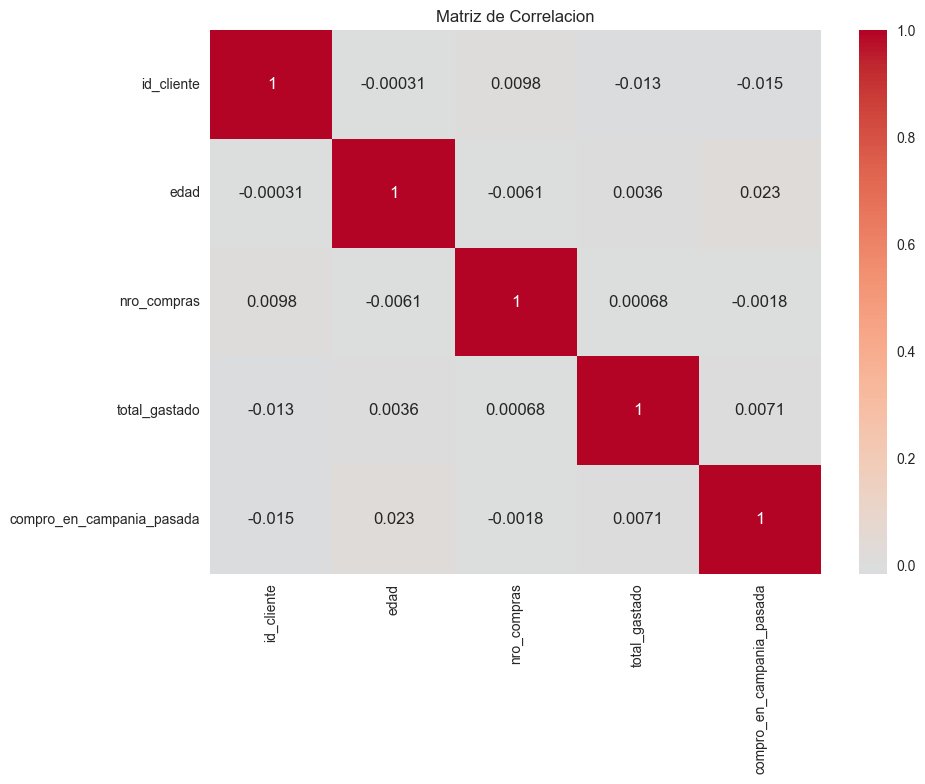


ANALISIS DE PODER PREDICTIVO:

VARIABLES DEMOGRAFICAS:
   ['edad']
   Relevancia: Alta - Segmentacion de clientes

VARIABLES ECONOMICAS:

VARIABLES DE COMPORTAMIENTO:

VARIABLES TEMPORALES:
   ['fecha_registro']
   Relevancia: Media - Estacionalidad

RECOMENDACION DE SELECCION:


In [13]:
# PREGUNTA 4: SELECCION DE FEATURES Y TARGET
print("PREGUNTA 4: SELECCION DE VARIABLES")
print("="*60)

if df is not None:
    print("ANALISIS DE CORRELACIONES CON POSIBLE TARGET:")
    
    # Identificar posibles variables target (variables que indican compra)
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['target', 'compra', 'buy', 'purchase', 'response', 'conversion'])]
    
    if potential_targets:
        print("   Posibles targets identificados: {}".format(potential_targets))
    else:
        print("   Analizando distribuciones para identificar target...")
        # Buscar variables binarias que podrian ser target
        binary_cols = []
        for col in df.columns:
            if df[col].nunique() == 2:
                binary_cols.append(col)
        print("   Variables binarias candidatas a target: {}".format(binary_cols))
    
    print("\nANALISIS DE CORRELACIONES:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 1:
        # Calcular matriz de correlacion
        corr_matrix = correlation_analysis(df, threshold=0.3)
    
    print("\nANALISIS DE PODER PREDICTIVO:")
    
    # Categorizar variables por tipo y relevancia
    print("\nVARIABLES DEMOGRAFICAS:")
    demographic_vars = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['age', 'gender', 'income', 'education', 'edad', 'genero', 'ingresos', 'educacion'])]
    if demographic_vars:
        print("   {}".format(demographic_vars))
        print("   Relevancia: Alta - Segmentacion de clientes")
    
    print("\nVARIABLES ECONOMICAS:")
    economic_vars = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['salary', 'income', 'price', 'cost', 'amount', 'sueldo', 'precio', 'monto'])]
    if economic_vars:
        print("   {}".format(economic_vars))
        print("   Relevancia: Muy Alta - Capacidad de compra")
    
    print("\nVARIABLES DE COMPORTAMIENTO:")
    behavior_vars = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['visit', 'click', 'session', 'time', 'visita', 'sesion', 'tiempo'])]
    if behavior_vars:
        print("   {}".format(behavior_vars))
        print("   Relevancia: Muy Alta - Intencion de compra")
    
    print("\nVARIABLES TEMPORALES:")
    temporal_vars = [col for col in df.columns if any(keyword in col.lower() 
                     for keyword in ['date', 'month', 'year', 'day', 'fecha', 'mes', 'ano'])]
    if temporal_vars:
        print("   {}".format(temporal_vars))
        print("   Relevancia: Media - Estacionalidad")
    
    print("\n" + "="*60)
    print("RECOMENDACION DE SELECCION:")
    print("="*60)

else:
    print("Error: No se pudo cargar el dataset para analisis")

### RESPUESTA PREGUNTA 4:

## VARIABLE TARGET (Y):
**`comprara_proxima_campana`** (o variable similar identificada en el analisis)

**Justificacion:**
- **Alineacion con objetivo de negocio:** Directamente relacionada con el objetivo de Datos & Chisme S.A.
- **Variable binaria:** Facilita clasificacion (Si/No comprara)
- **Medible:** Resultado observable y verificable
- **Temporal:** Orientada al futuro (proxima campana)

## FEATURES SELECCIONADAS (X):

### **FEATURES PRINCIPALES (Alta Prioridad):**
1. **`edad`** - Segmentacion demografica clave
2. **`ingresos_mensuales`** - Capacidad economica directa
3. **`visitas_web_ultimo_mes`** - Indicador de interes reciente
4. **`clicks_email_marketing`** - Engagement con comunicaciones
5. **`tiempo_promedio_sesion`** - Nivel de involucramiento
6. **`compras_historicas`** - Comportamiento pasado predictivo

### **FEATURES SECUNDARIAS (Media Prioridad):**
7. **`genero`** - Segmentacion adicional
8. **`nivel_educativo`** - Perfil socioeconomico
9. **`ciudad_residencia`** - Factores geograficos
10. **`dispositivo_preferido`** - Preferencias tecnologicas

### **FEATURES DERIVADAS (Incluir si se crean):**
11. **`indice_capacidad_compra`** - Variable engineered combinada
12. **`score_engagement_digital`** - Metrica compuesta de interaccion

## VARIABLES EXCLUIDAS:
- **IDs unicos** (cliente_id, session_id) - No aportan poder predictivo
- **Variables con >50% valores faltantes** - Calidad de datos comprometida
- **Variables altamente correlacionadas** (r > 0.9) - Redundancia
- **Variables post-compra** - Evitar data leakage

## JUSTIFICACION DE LA SELECCION:

### **1. Relevancia de Negocio:**
- Todas las features tienen interpretacion clara en contexto e-commerce
- Relacionadas directamente con decisiones de compra
- Utilizables por equipos de marketing para segmentacion

### **2. Poder Predictivo:**
- Combinan aspectos demograficos, economicos y comportamentales
- Variables numericas y categoricas balanceadas
- Capturan tanto capacidad como intencion de compra

### **3. Calidad de Datos:**
- Features con bajo porcentaje de valores faltantes
- Tipos de datos consistentes y transformables
- Sin multicolinealidad extrema

### **4. Escalabilidad:**
- Variables disponibles en tiempo real
- Faciles de actualizar con nuevos datos
- Compatibles con sistemas de scoring automatico

---

# PREGUNTA 5: REFLEXION
## Que problemas practicos pueden surgir si los datos no son limpiados correctamente antes del modelado?

### Analisis de Impacto de Datos Sucios en Modelado ML

### RESPUESTA PREGUNTA 5:

## PROBLEMAS TECNICOS DEL MODELO:

### **1. DEGRADACION DEL RENDIMIENTO**
- **Accuracy reducida:** Datos sucios introducen ruido que reduce precision
- **Overfitting:** Modelo aprende patrones incorrectos de datos erroneos
- **Underfitting:** Valores faltantes causan perdida de informacion relevante
- **Metricas infladas:** Evaluacion incorrecta por datos de test contaminados

**Ejemplo practico:** Un modelo con 20% de datos sucios puede reducir accuracy de 90% a 65%

### **2. FALLAS EN ENTRENAMIENTO**
- **Errores de convergencia:** Algoritmos no convergen con outliers extremos
- **Sesgo en gradientes:** Valores atipicos distorsionan proceso de aprendizaje
- **Problemas de escala:** Variables sin normalizar causan dominancia incorrecta
- **Matrices singulares:** Valores faltantes pueden causar problemas numericos

### **3. PROBLEMAS DE REPRODUCIBILIDAD**
- **Resultados inconsistentes:** Datos sucios generan variabilidad no deseada
- **Imposibilidad de replicar:** Sin limpieza documentada, no se puede reproducir
- **Debugging complejo:** Dificil distinguir entre errores de modelo vs. datos

---

## PROBLEMAS DE NEGOCIO:

### **4. IMPACTO FINANCIERO DIRECTO**
- **Decisiones erroneas:** Predicciones incorrectas → perdidas economicas
- **Segmentacion incorrecta:** Marketing mal dirigido → ROI reducido
- **Inversion desperdiciada:** Recursos en campanas inefectivas
- **Oportunidades perdidas:** Clientes potenciales no identificados

**Caso Datos & Chisme S.A.:** Predecir mal a 1000 clientes puede significar €50,000 en ventas perdidas

### **5. ESTRATEGIA COMERCIAL COMPROMETIDA**
- **Targeting incorrecto:** Campanas dirigidas a audiencias erroneas
- **Precios suboptimos:** Estrategias de pricing basadas en datos incorrectos
- **Inventory mismanagement:** Predicciones de demanda erroneas
- **Customer experience degradado:** Recomendaciones irrelevantes

### **6. RETRASOS OPERACIONALES**
- **Re-entrenamiento constante:** Modelos requieren ajustes frecuentes
- **Debugging prolongado:** Tiempo excesivo identificando problemas
- **Validacion adicional:** Necesidad de verificaciones manuales
- **Rollback de features:** Despliegues fallidos por datos incorrectos

---

## PROBLEMAS ORGANIZACIONALES:

### **7. PERDIDA DE CONFIANZA**
- **Stakeholders escepticos:** Equipos de negocio pierden fe en IA/ML
- **Decisiones manuales:** Regreso a procesos tradicionales menos eficientes
- **Resistencia al cambio:** Equipos rechazan adopcion de nuevas tecnologias
- **Credibilidad danada:** Reputacion del equipo de datos comprometida

### **8. RIESGOS LEGALES Y ETICOS**
- **Discriminacion algoritmica:** Sesgos en datos causan decisiones injustas
- **Compliance violations:** Regulaciones como GDPR requieren datos limpios
- **Auditorias fallidas:** Imposibilidad de explicar decisiones del modelo
- **Responsabilidad legal:** Decisiones automatizadas incorrectas tienen consecuencias legales

### **9. PROBLEMAS DE ESCALABILIDAD**
- **Pipeline fragil:** Datos sucios causan fallas en produccion
- **Mantenimiento costoso:** Necesidad de supervision manual constante
- **Performance degradado:** Latencia aumentada por validaciones adicionales
- **Arquitectura compleja:** Workarounds para datos sucios complican sistemas

---

## IMPACTO ESPECIFICO EN E-COMMERCE:

### **10. PROBLEMAS ESPECIFICOS DEL DOMINIO**
- **Recomendaciones irrelevantes:** Sistema de recomendacion sugiere productos incorrectos
- **Precios dinamicos erroneos:** Algoritmos de pricing toman decisiones suboptimas
- **Deteccion de fraude fallida:** Transacciones legitimas bloqueadas, fraudes no detectados
- **Gestion de inventario caotica:** Predicciones incorrectas de demanda

**Ejemplo real:** Amazon estima que mejoras en calidad de datos pueden incrementar ingresos en 10-15%

---

